<a href="https://colab.research.google.com/github/cstecker/politicsRLab/blob/main/sozial%20verzerrte%20Wahlbeteiligung%20(OB-Wahl%20FFM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sozial ungleiche Wahlbeteiligung**

**Alle Befehle bzw. Code-Schnipsel können Sie mit *Strg+Enter* oder durch das klicken des Play-Buttons passagenweise ausführen.** Darunter sehen Sie dann jeweils welches Ergebnis die jeweiligen Zeilen produzieren.
Sie können die Zeilen auch verändern und schauen, wie sich der Code verändert.

Laden wir uns zunächst die Library mit den Befehlen, die wir bei der Analyse benötigen. Libraries sind Bibliotheken von Befehlen. Das tidyverse ist eine ganze Sammlung von Paketen, die insbesondere von Hadley Wickham, einem Superstar in der R-Welt, geprägt wurden:

In [14]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Nun laden wir die Datensätze. (Die aufbereiteten Datensätze werden auf github bereitgestellt. Die Details hierzu müssen uns erst einmal nicht weiter kümmern).

In [8]:
# Datensätze herunterladen -------------------------------------------------------------
download.file("https://github.com/cstecker/politicsRLab/blob/main/data/ffm_ob_wbz_results.Rda?raw=true", "ffm_ob_wbz_results.Rda")
download.file("https://github.com/cstecker/politicsRLab/blob/main/data/ffm_stadtteil_2023.Rda?raw=true", "ffm_stadtteil_2023.Rda")
download.file("https://github.com/cstecker/politicsRLab/blob/main/data/ffm_wbz_stadtteile.Rda?raw=true", "ffm_wbz_stadtteile.Rda")

In [5]:
list.files()

[1] "ffm_ob_wbz_results.Rda"     "ffm_stadtteil_2023.Rda.Rda"
[3] "ffm_wbz_stadtteile.Rda"     "sample_data"

In [7]:
# Datensätze laden
load("ffm_ob_wbz_results.Rda")
load("ffm_stadtteil_2023.Rda")
load("ffm_wbz_stadtteile.Rda")

In [ ]:
# Betrachten der Daten
ffm_ob_wbz_results

In [ ]:
# Betrachten der Daten
wbz_stadtteile

In [12]:
# Betrachten der Daten
ffm_socstrk

stadtteil,mean_age,auslaender,migrant,wohnflaech,gymn,arbeitslose,median_brutto
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altstadt,42.4,36.45123,23.45476,46.6,0.0,5.8,4708.833
Innenstadt,41.4,45.54198,19.26718,46.9,67.2,5.1,3903.278
Bahnhofsviertel,37.7,49.98650,14.47475,55.2,41.4,7.0,4653.000
Westend-Süd,40.3,27.29061,19.84678,53.7,88.3,1.6,6374.890
Westend-Nord,39.1,28.78993,24.64666,46.3,87.4,2.5,5445.143
Nordend-West,40.6,21.35270,18.67312,45.0,74.5,2.3,5329.176
Nordend-Ost,41.2,22.26064,18.51740,40.2,54.2,2.8,4939.483
Ostend,41.9,28.53488,21.53582,40.1,69.4,3.6,4615.443
Bornheim,43.0,23.77686,22.23270,37.2,49.7,3.5,4346.796


## soziale Ungleichheit in Frankfurt

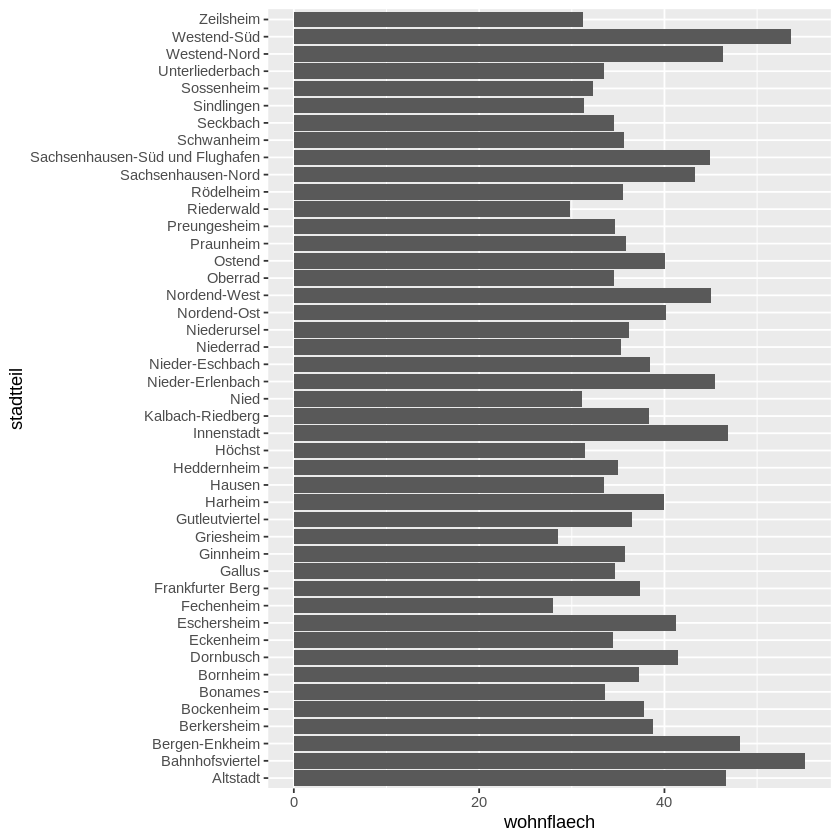

In [17]:
# Wohnflaeche
ffm_socstrk %>%
  ggplot(aes(x = wohnflaech, y = stadtteil)) +
  geom_col() 

In [ ]:
# Wählen Sie einen eigenen Indikator
ffm_socstrk %>%
  ggplot(aes(x = ..., y = stadtteil)) +
  geom_col() 

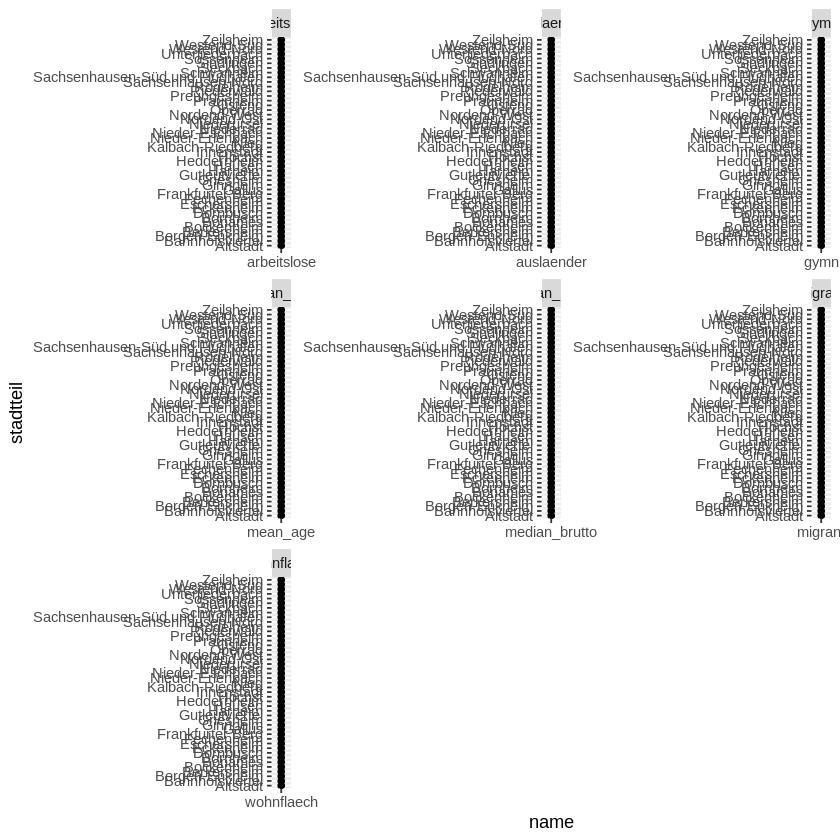

In [22]:
# alles auf einen Blick
ffm_socstrk %>%
  pivot_longer(-stadtteil) 

# Sozial ungleiches Wahlverhalten

In [37]:
ffm_ob_wbz_results %>% 
  filter(date == "2023-03-05", wbz_art == "Präsenzwahl") %>% 
  left_join(wbz_stadtteile) %>% 
  select(date, stadtteil, wbz_nr, everything()) %>% 
  group_by(stadtteil) %>% 
  summarise(across(c(gueltig, sperrW , wahlberechtigt), sum)) %>% 
  mutate(turnout = (gueltig+sperrW)/wahlberechtigt*100) %>% 
  left_join(select(ffm_socstrk, -mean_age)) %>% 
  drop_na(stadtteil) %>%
  View()

Joining with `by = join_by(wbz_nr)`
Joining with `by = join_by(stadtteil)`


stadtteil,gueltig,sperrW,wahlberechtigt,turnout,auslaender,migrant,wohnflaech,gymn,arbeitslose,median_brutto
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altstadt,667,622,2888,44.63296,36.45123,23.45476,46.6,0.0,5.8,4708.833
Bahnhofsviertel,468,466,2358,39.60984,49.98650,14.47475,55.2,41.4,7.0,4653.000
Bergen-Enkheim,3577,2977,13153,49.82894,20.10229,20.35802,48.2,64.2,4.4,4022.524
Berkersheim,656,633,2524,51.06973,21.20587,29.70884,38.8,63.6,5.3,3972.375
Bockenheim,6884,5920,27165,47.13418,33.15140,22.28999,37.8,59.4,3.2,4812.760
Bonames,966,627,4348,36.63753,28.72868,30.44961,33.6,45.3,6.6,3328.625
Bornheim,6342,4652,22165,49.60072,23.77686,22.23270,37.2,49.7,3.5,4346.796
Dornbusch,3954,3163,13360,53.27096,22.24953,23.96473,41.5,68.4,3.6,4317.924
Eckenheim,2069,1493,9294,38.32580,29.87851,29.17043,34.4,27.9,6.5,3597.722


Joining with `by = join_by(wbz_nr)`
Joining with `by = join_by(stadtteil)`
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


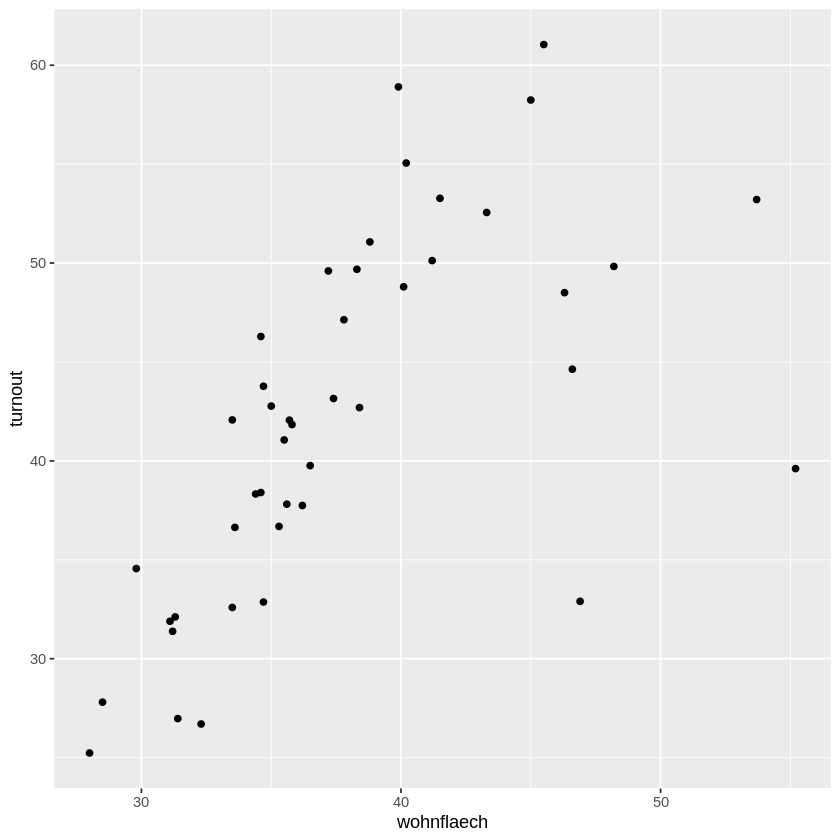

In [36]:
ffm_ob_wbz_results %>% 
  filter(date == "2023-03-05", wbz_art == "Präsenzwahl") %>% 
  left_join(wbz_stadtteile) %>% 
  select(date, stadtteil, wbz_nr, everything()) %>% 
  group_by(stadtteil) %>% 
  summarise(across(c(gueltig, sperrW , wahlberechtigt), sum)) %>% 
  mutate(turnout = (gueltig+sperrW)/wahlberechtigt*100) %>% 
  left_join(select(ffm_socstrk, -mean_age)) %>% 
  drop_na(stadtteil) %>%
  ggplot(aes(x = wohnflaech, y = turnout)) +
  geom_point()

Joining with `by = join_by(wbz_nr)`
Joining with `by = join_by(stadtteil)`
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 15 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 15 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


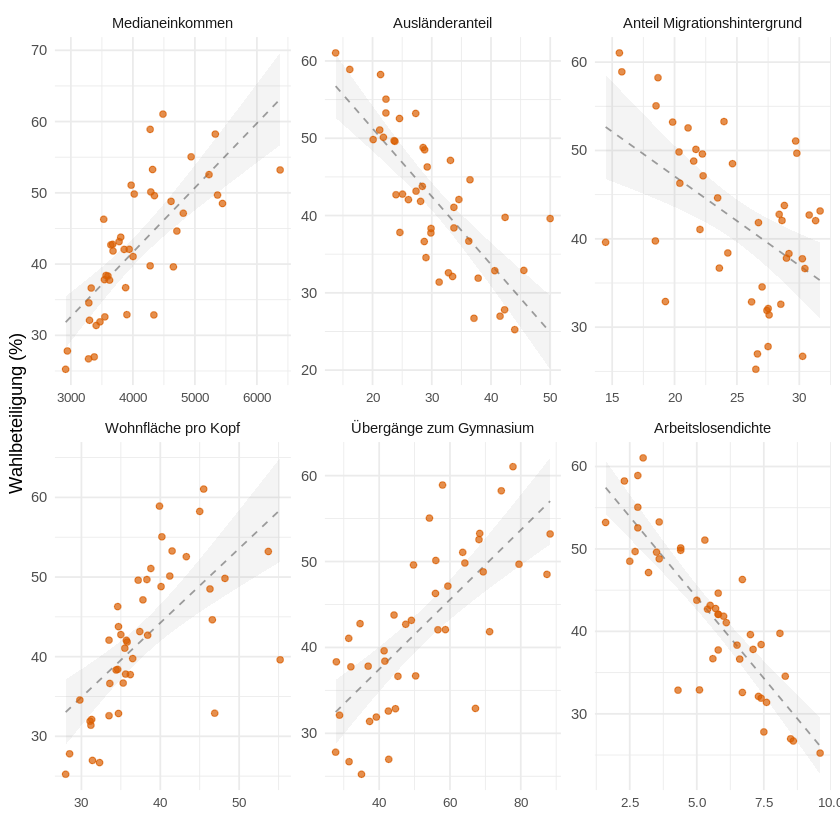

In [27]:
# alles auf einen Blick
ffm_ob_wbz_results %>% 
  filter(date == "2023-03-05", wbz_art == "Präsenzwahl") %>% 
  left_join(wbz_stadtteile) %>% 
  select(date, stadtteil, wbz_nr, everything()) %>% 
  group_by(stadtteil) %>% 
  summarise(across(c(gueltig, sperrW , wahlberechtigt), sum)) %>% 
  mutate(turnout = (gueltig+sperrW)/wahlberechtigt*100) %>% 
  left_join(select(ffm_socstrk, -mean_age)) %>% 
  drop_na(stadtteil) %>%
  pivot_longer(c(auslaender:median_brutto)) %>% 
  mutate(value = replace(value, value == 0, NA)) %>% 
  mutate(name = factor(name, levels = c("median_brutto", "auslaender", "migrant", "wohnflaech", "gymn", "arbeitslose"))) %>% 
  ggplot(aes(x = value, y =  turnout)) +
  geom_ribbon(stat='smooth', method = "lm", se=TRUE, alpha=0.1, fill = "grey60",
              aes(color = NULL)) +
  geom_line(stat="smooth", method = "lm",
            size = .5,
            linetype ="dashed",
            alpha = 0.5,
            color = "grey25") +
  geom_point(color = "#D95F02", alpha = .7) +
  facet_wrap(vars(name), scales = "free",
             labeller = 
               labeller(name = 
                          c("median_brutto" = "Medianeinkommen",
                            "arbeitslose" = "Arbeitslosendichte" , 
                            "auslaender" = "Ausländeranteil", 
                            "gymn" = "Übergänge zum Gymnasium", 
                            "migrant" = "Anteil Migrationshintergrund",
                            "wohnflaech" = "Wohnfläche pro Kopf"))) +
  labs(x = "", y = "Wahlbeteiligung (%)") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 8)
  )
  

# Regressionsanalyse

In [40]:
# Vorbereiten der Daten
reg_data <- ffm_ob_wbz_results %>% 
  filter(date == "2023-03-05", wbz_art == "Präsenzwahl") %>% 
  left_join(wbz_stadtteile) %>% 
  select(date, stadtteil, wbz_nr, everything()) %>% 
  group_by(stadtteil) %>% 
  summarise(across(c(gueltig, sperrW , wahlberechtigt), sum)) %>% 
  mutate(turnout = (gueltig+sperrW)/wahlberechtigt*100) %>% 
  left_join(select(ffm_socstrk, -mean_age)) %>% 
  drop_na(stadtteil) 
reg_data

Joining with `by = join_by(wbz_nr)`
Joining with `by = join_by(stadtteil)`


stadtteil,gueltig,sperrW,wahlberechtigt,turnout,auslaender,migrant,wohnflaech,gymn,arbeitslose,median_brutto
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altstadt,667,622,2888,44.63296,36.45123,23.45476,46.6,0.0,5.8,4708.833
Bahnhofsviertel,468,466,2358,39.60984,49.98650,14.47475,55.2,41.4,7.0,4653.000
Bergen-Enkheim,3577,2977,13153,49.82894,20.10229,20.35802,48.2,64.2,4.4,4022.524
Berkersheim,656,633,2524,51.06973,21.20587,29.70884,38.8,63.6,5.3,3972.375
Bockenheim,6884,5920,27165,47.13418,33.15140,22.28999,37.8,59.4,3.2,4812.760
Bonames,966,627,4348,36.63753,28.72868,30.44961,33.6,45.3,6.6,3328.625
Bornheim,6342,4652,22165,49.60072,23.77686,22.23270,37.2,49.7,3.5,4346.796
Dornbusch,3954,3163,13360,53.27096,22.24953,23.96473,41.5,68.4,3.6,4317.924
Eckenheim,2069,1493,9294,38.32580,29.87851,29.17043,34.4,27.9,6.5,3597.722


In [43]:
# Regression
model1 <- lm(turnout ~ median_brutto, data = reg_data)
model1


Call:
lm(formula = turnout ~ median_brutto, data = reg_data)

Coefficients:
  (Intercept)  median_brutto  
     5.444103       0.009054  


In [42]:
library(broom)

In [45]:
tidy(model1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.444102640,5.460082132,0.9970734,3.244389e-01
median_brutto,0.009053752,0.001323456,6.8409903,2.454717e-08


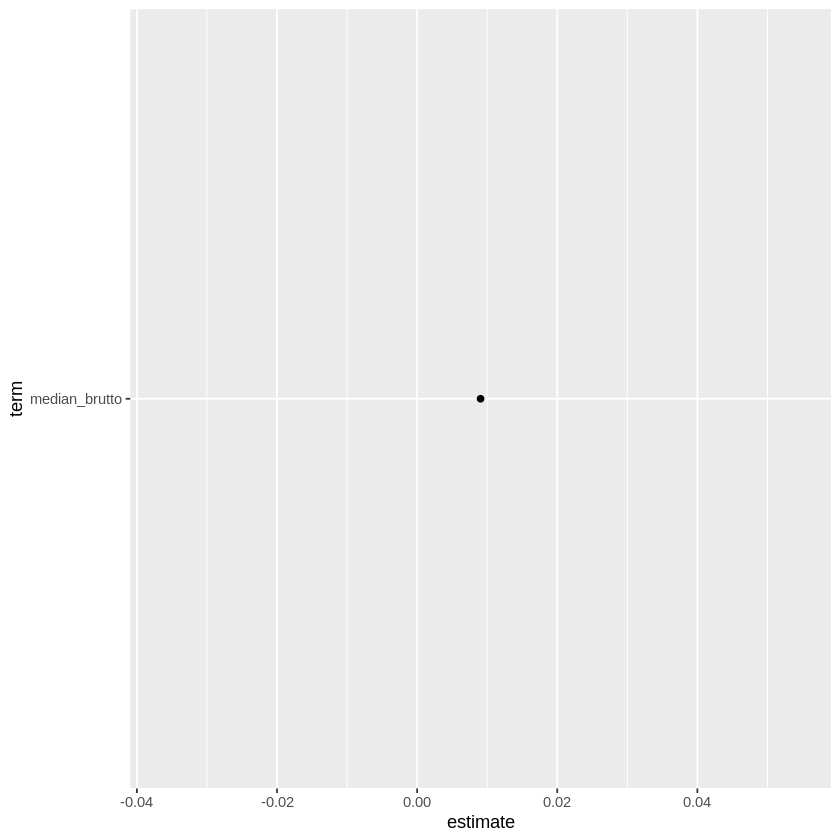

In [47]:
tidy(model1) %>%
  filter(term != "(Intercept)") %>%
  ggplot(aes(x = estimate, y = term)) +
  geom_point()